In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.utils.vis_utils import plot_model
#import pydot
from tensorflow.keras.models import Model

In [5]:
def build_model_with_sequential():
    seq_model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28,)),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return seq_model

In [6]:
def  build_model_with_functional():
    # instantiate the input Tensor
    input_layer = tf.keras.Input(shape=(28,28))
    
    # stack the layers using the syntax: new_layers()(previous layers)
    flatten_layer = tf.keras.layers.Flatten()(input_layer)
    first_dense = tf.keras.layers.Dense(128, activation=tf.nn.relu)(flatten_layer)
    output_layer = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(first_dense)
    
    # declare inputs and outputs
    func_model = Model(inputs=input_layer, outputs=output_layer)
    
    return func_model

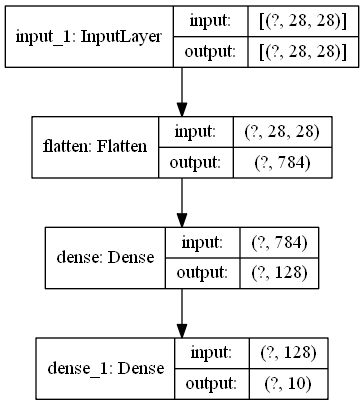

In [7]:
model = build_model_with_functional()
#model = build_model_with_sequential()

# plot model graph
plot_model(model, show_shapes=True, show_layer_names=True, to_file="model.png")

In [9]:
# prepare fashion mnist dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

# configure, train, and evaluate the model
model.compile(optimizer=tf.optimizers.Adam(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.5007 - accuracy: 0.8239
Epoch 2/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3761 - accuracy: 0.8656
Epoch 3/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3386 - accuracy: 0.8763
Epoch 4/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3111 - accuracy: 0.8864
Epoch 5/5
10000/10000 [==============================] - 0s 25us/sample - loss: 0.3691 - accuracy: 0.8679


[0.3691421733856201, 0.8679]